In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import matplotlib.pyplot as plt

In [2]:
a, b = 0, 1
A = B = 0
E = 10e-05
print(E)

def analitic(x):
    return np.log(2/(1+x))-np.log(2)*np.exp(-2*x / E)

0.0001


In [3]:
x = np.linspace(a, b, 11).reshape((-1, 1))

# print(x)
y = analitic(x)

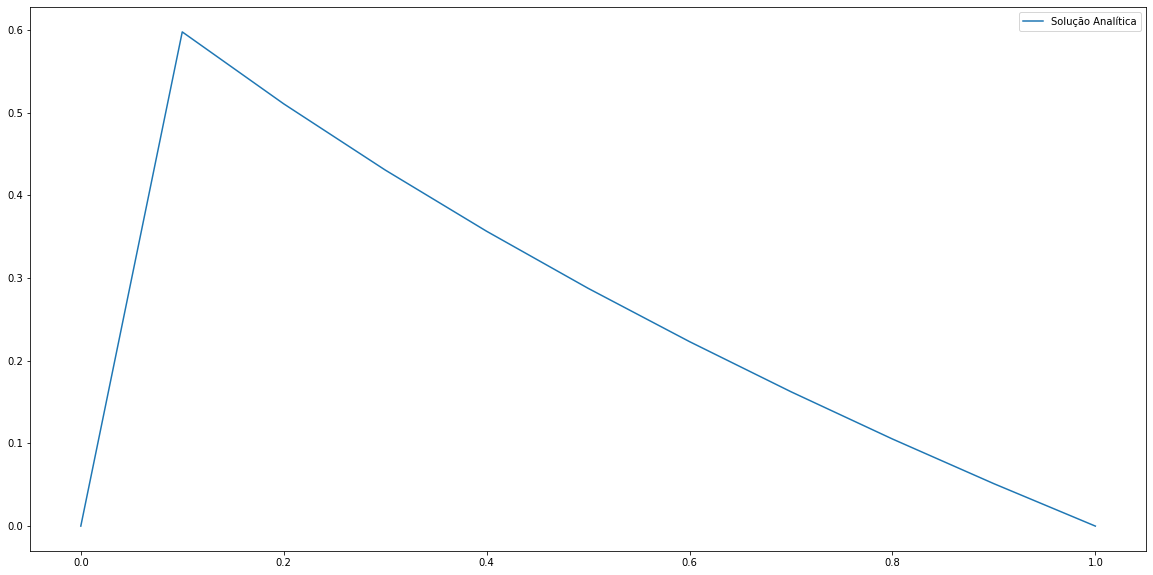

In [4]:
plt.figure(figsize=(20,10))
plt.plot(x, y, label='Solução Analítica') 
plt.legend()
plt.show()

In [5]:
def tansig(x):
    return (2 / (1 + np.exp(-2*x))) - 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    return [(rs.randn(insize, outsize) * scale,   # W
             rs.randn(outsize) * scale)           # b
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

params = init_random_params(0.1, layer_sizes=[1, 10, 1])

def N(params, inputs):
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = tansig(outputs)    
    return outputs

In [7]:

def f(x, y_t, dy_t):
    return (-2*dy_t - np.exp(y_t))/E

dN = elementwise_grad(N, 1)
d2N = elementwise_grad(dN, 1)


def y_trial(x, W):
    return (b*A - a*B)/(b-a) + (B-A)/(b-a)*x + (x-a)*(x-b)*N(W, x)

def dy_trial(x, W):
    return (B-A)/(b-a) + ((x-a)+(x-b))*N(W, x) + (x-a)*(x-b)*dN(W, x)

def d2y_trial(x, W):
    return 2*N(W, x) + 2*((x-a)+(x-b))*dN(W, x) + (x-a)*(x-b)*d2N(W, x)

def objective(params, step):
    y_t = y_trial(x, params)
    dy_t = dy_trial(x, params)
    d2y_t = d2y_trial(x, params)
    func = f(x, y_t, dy_t)
    
    return np.sum((d2y_t - func)**2)


In [8]:
def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))
        res = [y_trial(xi, params) for xi in x] 
        plt.plot(x, res, label="SE: ite{}".format(step+1000))

Iteration   0 objective 1093998380.92973
Iteration 1000 objective 1047489581.3913765
Iteration 2000 objective 1047369341.1791091
Iteration 3000 objective 1044152132.1492972
Iteration 4000 objective 1009626181.7947656
Iteration 5000 objective 1003826260.4910899
Iteration 6000 objective 996869690.2920407
Iteration 7000 objective 986435916.2496198
Iteration 8000 objective 945895477.9310832
Iteration 9000 objective 892403916.8435868
Iteration 10000 objective 750858209.972326
Iteration 11000 objective 526943108.74064535
Iteration 12000 objective 287025324.6945121
Iteration 13000 objective 117087131.53504097
Iteration 14000 objective 30954157.280499637
Iteration 15000 objective 4374757.267355107
Iteration 16000 objective 543524.6541641591
Iteration 17000 objective 141912.9536841746
Iteration 18000 objective 61211.141495977565
Iteration 19000 objective 39706.88358236526
Iteration 20000 objective 45854.21800973607
Iteration 21000 objective 48471.57410687415
Iteration 22000 objective 25345.4256

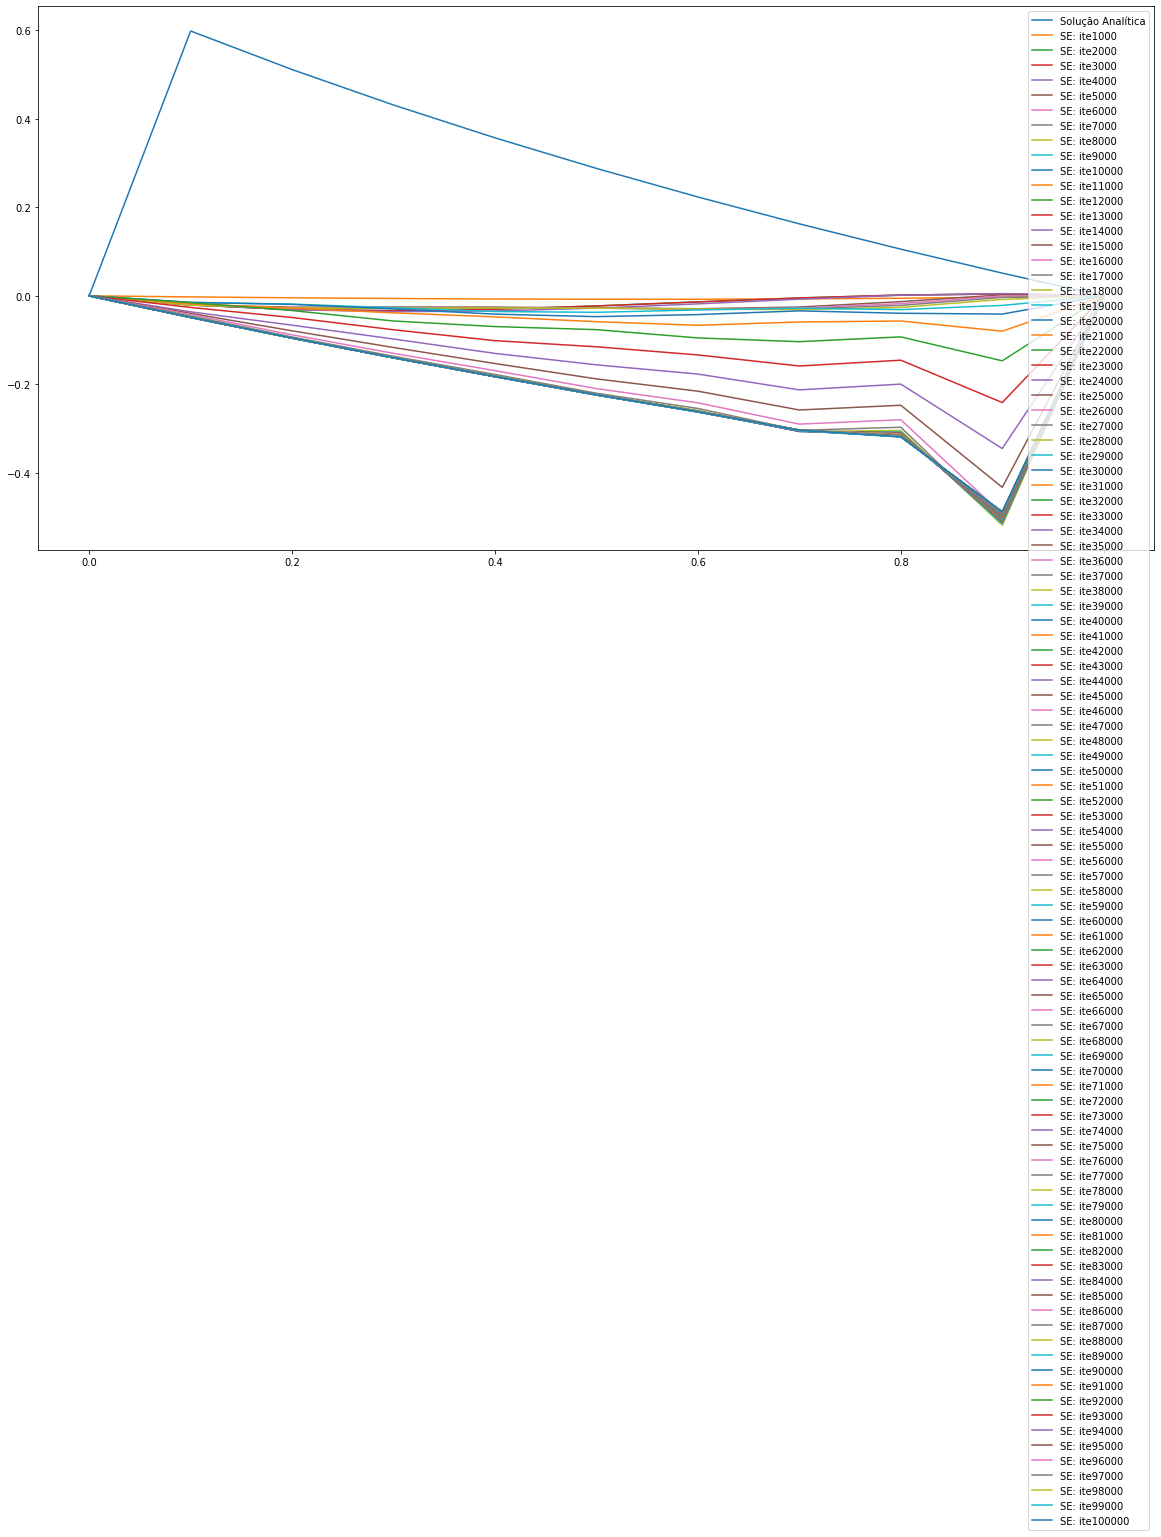

In [9]:
plt.figure(figsize=(20,10))
plt.plot(x, y, label='Solução Analítica') 
params = adam(grad(objective), params,
              step_size=0.001, num_iters=100000, callback=callback)
plt.legend()
plt.show()

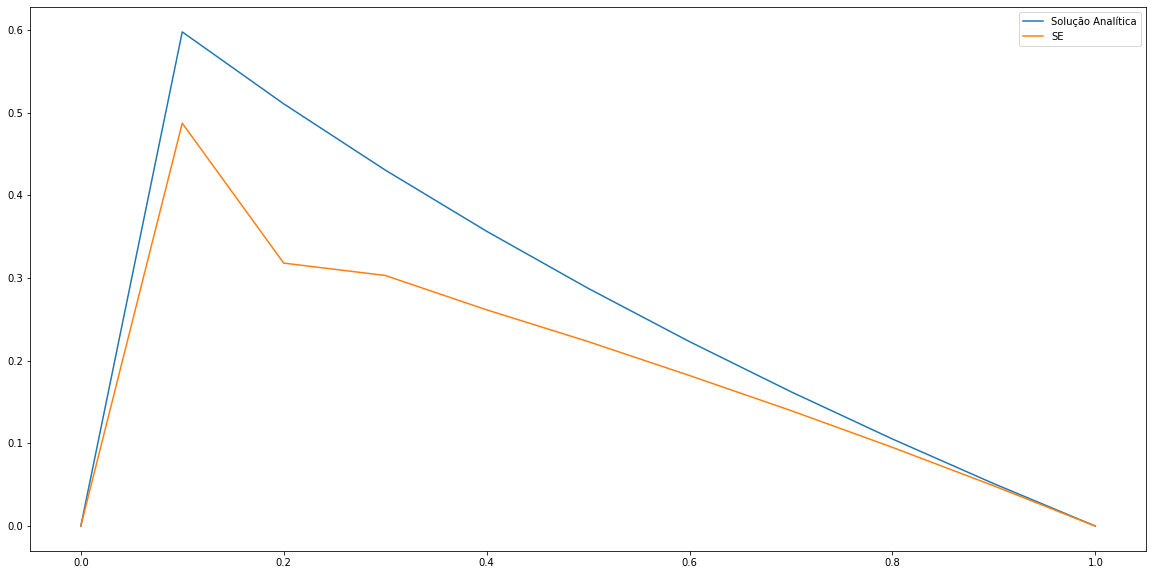

In [18]:
plt.figure(figsize=(20,10))
plt.plot(x, y, label='Solução Analítica') 
res = [-1*y_trial(xi, params) for xi in x]
res.reverse()
plt.plot(x, res, label="SE")
plt.legend()
plt.show()